     S.No            From Date              To Date  PM2.5 (ug/m3)  \
0     972  30-Aug-2019 - 00:00  31-Aug-2019 - 00:00          15.33   
1     973  31-Aug-2019 - 00:00  01-Sep-2019 - 00:00          14.77   
2     974  01-Sep-2019 - 00:00  02-Sep-2019 - 00:00          22.06   
3     975  02-Sep-2019 - 00:00  03-Sep-2019 - 00:00          10.32   
4     976  03-Sep-2019 - 00:00  04-Sep-2019 - 00:00           8.43   
..    ...                  ...                  ...            ...   
573  1545  25-Mar-2021 - 00:00  26-Mar-2021 - 00:00          95.35   
574  1546  26-Mar-2021 - 00:00  27-Mar-2021 - 00:00          80.78   
575  1547  27-Mar-2021 - 00:00  28-Mar-2021 - 00:00          91.00   
576  1548  28-Mar-2021 - 00:00  29-Mar-2021 - 00:00          75.03   
577  1549  29-Mar-2021 - 00:00  30-Mar-2021 - 00:00          53.72   

     Ozone (ug/m3)  SO2 (ug/m3)  PM10 (ug/m3)  NO2 (ug/m3)  CO (mg/m3)  
0            24.46         1.83         26.51        23.17        0.37  
1            

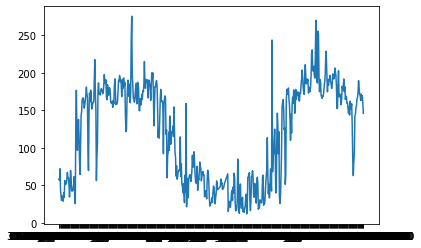

In [1]:
import numpy as np # linear algebra
import pandas as pd
import matplotlib.pyplot as plt
import os

#Function to calculate so2 individual pollutant index(si)
def calculate_si(so2):
    si=0
    if (so2<=40):
     si= so2*(50/40)
    if (so2>40 and so2<=80):
     si= 50+(so2-40)*(50/40)
    if (so2>80 and so2<=380):
     si= 100+(so2-80)*(100/300)
    if (so2>380 and so2<=800):
     si= 200+(so2-380)*(100/800)
    if (so2>800 and so2<=1600):
     si= 300+(so2-800)*(100/800)
    if (so2>1600):
     si= 400+(so2-1600)*(100/800)
    return si
    
#Function to calculate no2 individual pollutant index(ni)
def calculate_ni(no2):
    ni=0
    if(no2<=40):
     ni= no2*50/40
    elif(no2>40 and no2<=80):
     ni= 50+(no2-14)*(50/40)
    elif(no2>80 and no2<=180):
     ni= 100+(no2-80)*(100/100)
    elif(no2>180 and no2<=280):
     ni= 200+(no2-180)*(100/100)
    elif(no2>280 and no2<=400):
     ni= 300+(no2-280)*(100/120)
    else:
     ni= 400+(no2-400)*(100/120)
    return ni
    
def calculate_p25i(PM25):
    p25=0
    if(PM25<=12):
        p25i=PM25*50/12.0
    elif(PM25>12.1 and PM25<=35.4):
        p25i=51+(PM25-12.1)*49/23.3
    elif(PM25>35.5 and PM25<=55.4):
        p25i=101+(PM25-35.5)*49/19.9
    elif(PM25>55.5 and PM25<=150.4):
        p25i=151+(PM25-55.5)*49/94.9
    elif(PM25>150.5 and PM25<=250.4):
        p25i=201+(PM25-150.5)*99/99.9
    elif(PM25>250.5 and PM25<=350.4):
        p25i=301+(PM25-250.5)*99/99.9
    else:
        p25i=401+(PM25-250.5)*99/149.9    
    return p25i
    
def calculate_oi(o3):
    oi=0
    if(o3>54):
        oi=o3*50/54
    elif(o3>54 and o3<=70):
        oi=55+o3*49/15    
    elif(o3>70 and o3<=85):
        oi=101+(o3-125)*49/14 
    elif(o3>85 and o3<=105):
        oi=151+(o3-165)*49/19
    elif(o3>105 and o3<=200):
        oi=(201+o3-205)*99/94
    '''elif(o3>200 and o3<=504):  #error
        oi=301+o3*99/99
    else:
        oi=401+o3*99/99'''
    return oi
    
def calculate_p10i(PM10):
    p10i=0
    if(PM10<=54):
        p10i=PM10*50/54
    elif(PM10>54 and PM10<=154):
        p10i=51+(PM10-55)*49/99
    elif(PM10>154 and PM10<=254):
        p10i=101+(PM10-155)*49/99
    elif(PM10>254 and PM10<=354):
        p10i=151+(PM10-255)*49/99
    elif(PM10>354 and PM10<=424):
        p10i=201+(PM10-355)*99/69
    elif(PM10>424 and PM10<=504):
        p10i=301+(PM10-425)*99/79
    else:
        p10i=401+(PM10-505)*99/99
    return p10i
    
    
def calculate_coi(co):
    coi=0
    if(co<=4.4):
        coi=co+50/4.4
    elif(co>4.4 and co<=9.4):
        coi=51+co*49/4.9
    elif(co>9.4 and co<=12.4):
        coi=101+co*49/2.9
    elif(co>12.4 and co<=15.4):
        coi=151+co*49/2.9
    elif(co>15.4 and co<=30.4):
        coi=201+co*99/14.9
    elif(co>30.4 and co<=40.4):
        coi=301+co*99/9.9
    else:
        coi=401+co*99/9.9
    return coi
   
#function to calculate the air quality index (AQI) of every data value
#its is calculated as per indian govt standards
def calculate_aqi(si,ni,p25i,p10i,oi,coi):
    aqi=max(si,ni,p25i,p10i,oi,coi)    
    return aqi 
    
    
data=pd.read_csv('/home/prnv/kol.csv')
print(data)
data['si']=data['SO2 (ug/m3)'].apply(calculate_si)
data['ni']=data['NO2 (ug/m3)'].apply(calculate_ni)
data['p25i']=data['PM2.5 (ug/m3)'].apply(calculate_p25i)
data['oi']=data['Ozone (ug/m3)'].apply(calculate_oi)
data['p10i']=data['PM10 (ug/m3)'].apply(calculate_p10i)
data['coi']=data['CO (mg/m3)'].apply(calculate_coi)
data['AQI']=data.apply(lambda x:calculate_aqi(x['si'],x['ni'],x['p25i'],x['p10i'],x['oi'],x['coi']),axis=1)
df= data[['From Date','AQI']]
plt.plot(df['From Date'],df['AQI'])
plt.show()

In [2]:
df1=df.reset_index()['AQI']

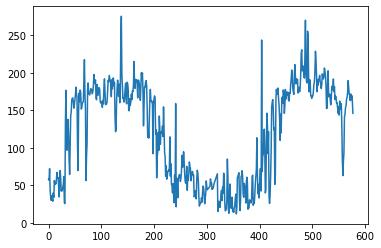

In [3]:
plt.plot(df1)

In [4]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [5]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]
training_size,test_size

(375, 203)

In [6]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=30):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3----29 30 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return np.array(dataX), np.array(dataY)

In [7]:
# reshape into X=t,t+1,t+2,..t+29 and Y=t+30
time_step = 30
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [8]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [9]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [10]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(30,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 30, 50)            10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 30, 50)            20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [13]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=2)

Epoch 1/100
6/6 - 6s - loss: 0.1116 - val_loss: 0.0173
Epoch 2/100
6/6 - 0s - loss: 0.0298 - val_loss: 0.0262
Epoch 3/100
6/6 - 0s - loss: 0.0223 - val_loss: 0.0289
Epoch 4/100
6/6 - 0s - loss: 0.0156 - val_loss: 0.0138
Epoch 5/100
6/6 - 0s - loss: 0.0170 - val_loss: 0.0170
Epoch 6/100
6/6 - 0s - loss: 0.0148 - val_loss: 0.0185
Epoch 7/100
6/6 - 0s - loss: 0.0136 - val_loss: 0.0141
Epoch 8/100
6/6 - 0s - loss: 0.0132 - val_loss: 0.0158
Epoch 9/100
6/6 - 0s - loss: 0.0127 - val_loss: 0.0149
Epoch 10/100
6/6 - 0s - loss: 0.0126 - val_loss: 0.0151
Epoch 11/100
6/6 - 0s - loss: 0.0125 - val_loss: 0.0149
Epoch 12/100
6/6 - 0s - loss: 0.0123 - val_loss: 0.0145
Epoch 13/100
6/6 - 0s - loss: 0.0122 - val_loss: 0.0153
Epoch 14/100
6/6 - 0s - loss: 0.0123 - val_loss: 0.0141
Epoch 15/100
6/6 - 0s - loss: 0.0122 - val_loss: 0.0143
Epoch 16/100
6/6 - 0s - loss: 0.0119 - val_loss: 0.0142
Epoch 17/100
6/6 - 0s - loss: 0.0117 - val_loss: 0.0142
Epoch 18/100
6/6 - 0s - loss: 0.0116 - val_loss: 0.0139
E

In [14]:
import tensorflow as tf

In [15]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [16]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [17]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

128.91183909680566

In [18]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

168.02785420949493

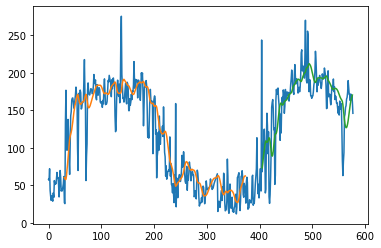

In [19]:
# shift train predictions for plotting
look_back=30
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [20]:
x_input=test_data[len(test_data)-30:].reshape(1,-1)
x_input.shape

(1, 30)

In [21]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [22]:
# demonstrate prediction for next 30 days
from numpy import array

lst_output=[]
n_steps=30
i=0
while(i<30):
    
    if(len(temp_input)>30):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.6077683]
31
1 day input [0.50917726 0.54222047 0.50011302 0.57080968 0.5293661  0.5432786
 0.55715192 0.4428307  0.27428138 0.19383292 0.26502343 0.31027569
 0.49188978 0.50403774 0.53820348 0.54792264 0.58143022 0.5894642
 0.61585876 0.67429128 0.63623764 0.60406253 0.60461119 0.57302393
 0.6065707  0.57802067 0.59804684 0.5667535  0.50899037 0.6077683 ]
1 day output [[0.60920614]]
2 day input [0.54222047 0.50011302 0.57080968 0.5293661  0.5432786  0.55715192
 0.4428307  0.27428138 0.19383292 0.26502343 0.31027569 0.49188978
 0.50403774 0.53820348 0.54792264 0.58143022 0.5894642  0.61585876
 0.67429128 0.63623764 0.60406253 0.60461119 0.57302393 0.6065707
 0.57802067 0.59804684 0.5667535  0.50899037 0.6077683  0.60920614]
2 day output [[0.610876]]
3 day input [0.50011302 0.57080968 0.5293661  0.5432786  0.55715192 0.4428307
 0.27428138 0.19383292 0.26502343 0.31027569 0.49188978 0.50403774
 0.53820348 0.54792264 0.58143022 0.5894642  0.61585876 0.67429128
 0.63623764 0.60406253 0.6

22 day output [[0.6503008]]
23 day input [0.60461119 0.57302393 0.6065707  0.57802067 0.59804684 0.5667535
 0.50899037 0.6077683  0.60920614 0.61087602 0.61318254 0.615484
 0.61841393 0.62108982 0.62382334 0.62655616 0.62848866 0.62942767
 0.63001758 0.63104248 0.63226485 0.63423777 0.63614213 0.63809711
 0.64001215 0.64200497 0.64397645 0.64601362 0.6482597  0.6503008 ]
23 day output [[0.6521661]]
24 day input [0.57302393 0.6065707  0.57802067 0.59804684 0.5667535  0.50899037
 0.6077683  0.60920614 0.61087602 0.61318254 0.615484   0.61841393
 0.62108982 0.62382334 0.62655616 0.62848866 0.62942767 0.63001758
 0.63104248 0.63226485 0.63423777 0.63614213 0.63809711 0.64001215
 0.64200497 0.64397645 0.64601362 0.6482597  0.6503008  0.65216613]
24 day output [[0.65399957]]
25 day input [0.6065707  0.57802067 0.59804684 0.5667535  0.50899037 0.6077683
 0.60920614 0.61087602 0.61318254 0.615484   0.61841393 0.62108982
 0.62382334 0.62655616 0.62848866 0.62942767 0.63001758 0.63104248
 0.6322

In [23]:
day_new=np.arange(1,31)
day_pred=np.arange(31,61)

In [24]:
len(df1)

578

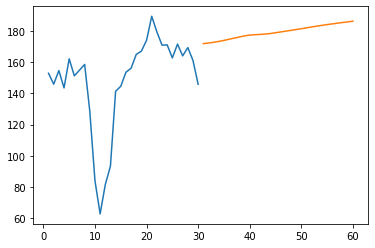

In [25]:
plt.plot(day_new,scaler.inverse_transform(df1[548:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

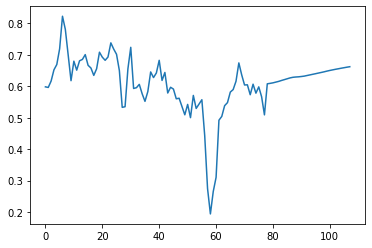

In [26]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[500:])

In [27]:
df3=scaler.inverse_transform(df3).tolist()

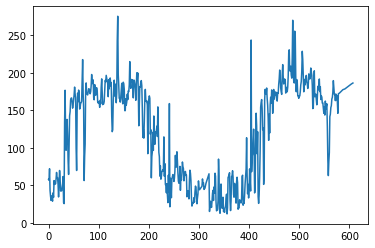

In [28]:
plt.plot(df3)